# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

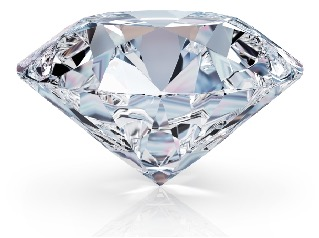

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [8]:
!pip -q install polars
import numpy as np
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
DIAMONDS_DATASET = "diamonds_good.csv"

In [10]:
df = pl.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [13]:
df.head(10)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.23,"""Ideal""","""E""","""SI2""",61.5,55.0,326.0,3.95,3.98,2.43
0.21,"""Premium""","""E""","""SI1""",59.8,61.0,326.0,3.89,3.84,2.31
0.23,"""Good""","""E""","""VS1""",56.9,65.0,327.0,4.05,4.07,2.31
0.29,"""Premium""","""I""","""VS2""",62.4,58.0,334.0,4.2,4.23,2.63
0.31,"""Good""","""J""","""SI2""",63.3,58.0,335.0,4.34,4.35,2.75
null,"""Very Good""","""J""","""VVS2""",62.8,57.0,336.0,3.94,3.96,2.48
0.24,"""Very Good""","""I""","""VVS1""",62.3,57.0,336.0,3.95,3.98,2.47
0.26,"""Very Good""","""H""","""SI1""",61.9,55.0,337.0,4.07,4.11,2.53
0.22,"""Fair""","""E""","""VS2""",65.1,61.0,337.0,3.87,3.78,2.49


In [14]:
df.tail()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.72,"""Ideal""","""D""","""SI1""",60.8,57.0,2757.0,5.75,5.76,3.5
0.72,"""Good""","""D""","""SI1""",63.1,55.0,2757.0,5.69,5.75,3.61
0.7,"""Very Good""","""D""","""SI1""",62.8,60.0,2757.0,5.66,5.68,3.56
0.86,"""Premium""","""H""","""SI2""",61.0,58.0,2757.0,6.15,6.12,3.74
0.75,"""Ideal""","""D""","""SI2""",62.2,55.0,2757.0,5.83,5.87,3.64


In [15]:
df.sample(3)

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.3,"""Good""","""E""","""SI1""",63.6,57.0,675.0,4.24,4.22,2.69
0.7,"""Premium""","""I""","""VS2""",63.0,60.0,1966.0,5.62,5.59,3.53
0.71,"""Good""","""F""","""SI1""",63.7,58.0,2308.0,5.65,5.62,3.59


## Исследование данных

Размер датасета

In [18]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [20]:
df.schema

Schema([('carat', Float64),
        ('cut', String),
        ('color', String),
        ('clarity', String),
        ('depth', Float64),
        ('table', Float64),
        ('price', Float64),
        ("'x'", Float64),
        ("'y'", Float64),
        ("'z'", Float64)])

Основные числовые характеристики

In [22]:
df.describe()

statistic,carat,cut,color,clarity,depth,table,price,'x','y','z'
str,f64,str,str,str,f64,f64,f64,f64,f64,f64
"""count""",53442.0,"""53940""","""53940""","""53940""",52950.0,53940.0,53940.0,53940.0,53935.0,53940.0
"""null_count""",498.0,"""0""","""0""","""0""",990.0,0.0,0.0,0.0,5.0,0.0
"""mean""",0.797561,null,null,null,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
"""std""",0.473534,null,null,null,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
"""min""",0.2,"""Fair""","""D""","""I1""",43.0,43.0,326.0,0.0,0.0,0.0
"""25%""",0.4,null,null,null,61.0,56.0,950.0,4.71,4.72,2.91
"""50%""",0.7,null,null,null,61.8,57.0,2401.0,5.7,5.71,3.53
"""75%""",1.04,null,null,null,62.5,59.0,5324.0,6.54,6.54,4.04
"""max""",5.01,"""Very Good""","""J""","""VVS2""",79.0,95.0,18823.0,10.74,58.9,31.8


In [23]:
duplicated_count = df.height - df.unique().height
print(f"Количество дубликатов: {duplicated_count}")

Количество дубликатов: 135


In [24]:
df.filter(df.is_duplicated())

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
0.79,"""Ideal""","""G""","""SI1""",62.3,57.0,2898.0,5.9,5.85,3.66
…,…,…,…,…,…,…,…,…,…
0.71,"""Good""","""F""","""SI2""",64.1,60.0,2130.0,0.0,0.0,0.0
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17
0.51,"""Ideal""","""F""","""VVS2""",61.2,56.0,2203.0,5.19,5.17,3.17


In [25]:
df = df.unique()
df.shape

(53805, 10)

In [26]:
df.head()

carat,cut,color,clarity,depth,table,price,'x','y','z'
f64,str,str,str,f64,f64,f64,f64,f64,f64
0.53,"""Very Good""","""E""","""VS1""",58.5,61.0,1852.0,5.28,5.39,3.12
0.56,"""Very Good""","""F""","""VS1""",58.2,60.0,1915.0,5.38,5.41,3.14
0.57,"""Ideal""","""D""","""VS2""",62.1,56.0,1963.0,5.34,5.29,3.3
1.13,"""Premium""","""H""","""SI2""",62.3,59.0,4294.0,6.68,6.65,4.15
1.01,"""Ideal""","""E""","""VVS1""",61.8,54.0,10789.0,6.43,6.49,3.99


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [29]:
hist_result = df['carat'].hist(bin_count=30)

# Преобразуем в удобный формат
hist_df = hist_result
print(hist_df)

shape: (30, 3)
┌────────────┬──────────────────────┬───────┐
│ breakpoint ┆ category             ┆ count │
│ ---        ┆ ---                  ┆ ---   │
│ f64        ┆ cat                  ┆ u32   │
╞════════════╪══════════════════════╪═══════╡
│ 0.360333   ┆ [0.2, 0.360333]      ┆ 11484 │
│ 0.520667   ┆ (0.360333, 0.520667] ┆ 9154  │
│ 0.681      ┆ (0.520667, 0.681]    ┆ 4219  │
│ 0.841333   ┆ (0.681, 0.841333]    ┆ 6718  │
│ 1.001667   ┆ (0.841333, 1.001667] ┆ 4438  │
│ …          ┆ …                    ┆ …     │
│ 4.368667   ┆ (4.208333, 4.368667] ┆ 0     │
│ 4.529      ┆ (4.368667, 4.529]    ┆ 1     │
│ 4.689333   ┆ (4.529, 4.689333]    ┆ 0     │
│ 4.849667   ┆ (4.689333, 4.849667] ┆ 0     │
│ 5.01       ┆ (4.849667, 5.01]     ┆ 1     │
└────────────┴──────────────────────┴───────┘


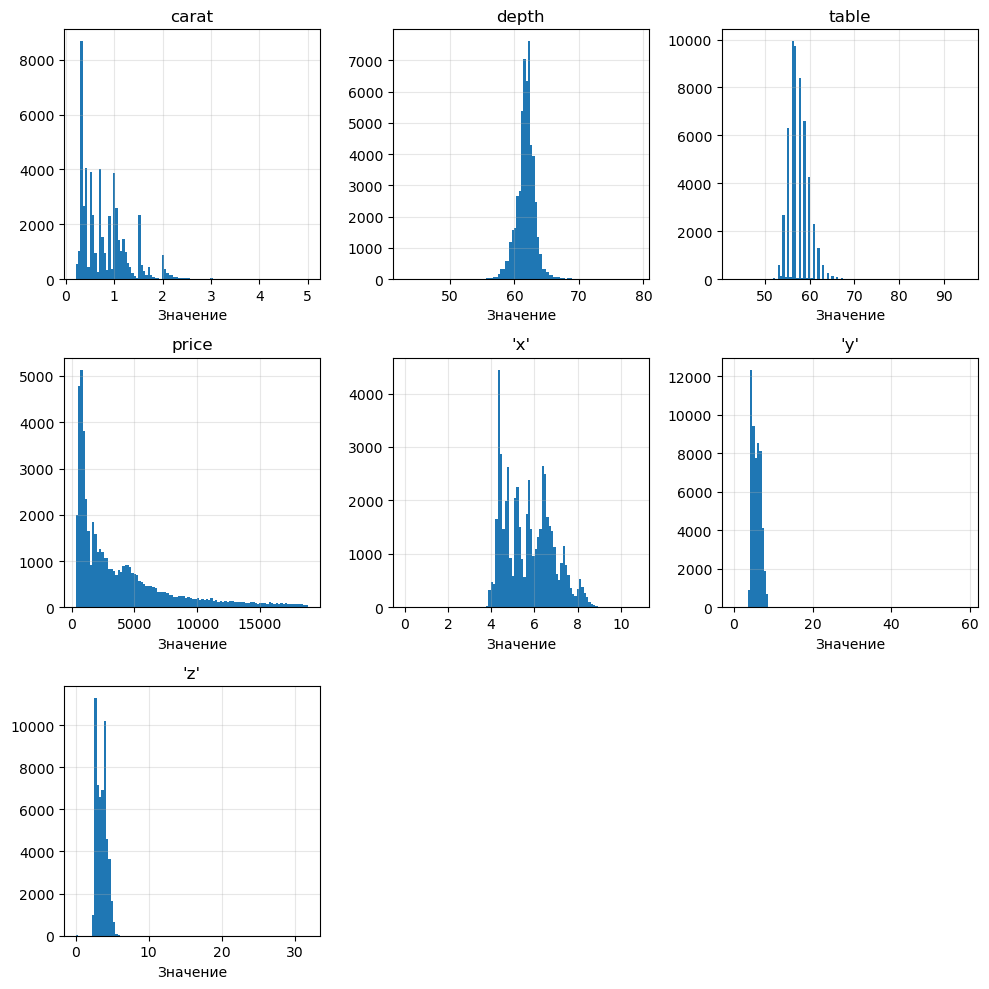

In [30]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, feature in enumerate(["carat","depth","table","price","'x'","'y'","'z'"]):
    axes[i].hist(df[feature], bins=100)

    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel('Значение')
    axes[i].grid(True, alpha=0.3)

axes[-1].axis('off')
axes[-2].axis('off')

plt.tight_layout()
plt.show()

In [31]:
median_carat = df.select(pl.col('carat').median()).item()
df = df.with_columns(
    pl.col('carat').fill_null(median_carat)
)

In [32]:
median_depth = df.select(pl.col('depth').median()).item()
df = df.with_columns(
    pl.col('depth').fill_null(median_depth)
)

### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [34]:
# ваш код здесь

median_y = df.select(pl.col("'y'").median()).item()
print(f"Медианное значение столбца 'y': {round(median_y, 2)}")

df = df.with_columns(
    pl.col("'y'").fill_null(median_y)
)

Медианное значение столбца 'y': 5.71


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

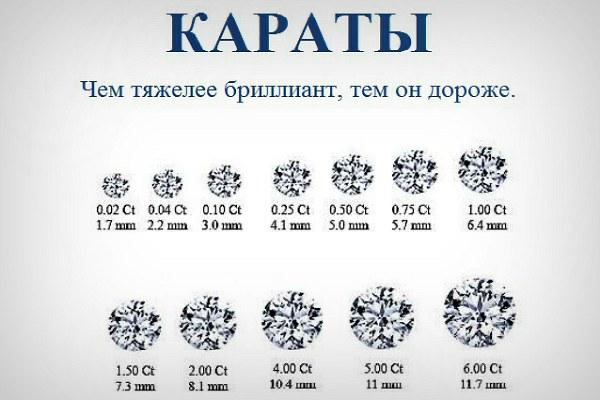

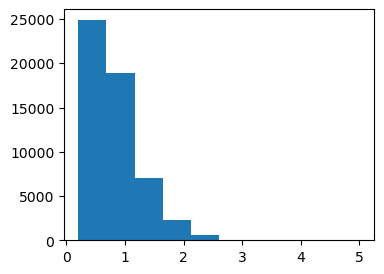

In [38]:
plt.figure(figsize=(4,3))

plt.hist(df['carat']);

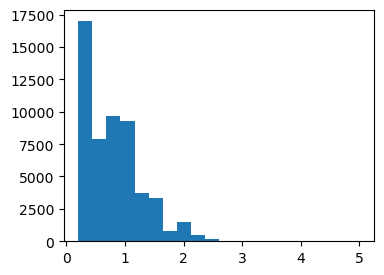

In [39]:
plt.figure(figsize=(4,3))

plt.hist(df['carat'], bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [41]:
min_max = df.select([
    pl.col('carat').min().alias('min_carat'),
    pl.col('carat').max().alias('max_carat')
])
min_max

min_carat,max_carat
f64,f64
0.2,5.01


Сколько мелких бриллиантов в датасете?

In [43]:
df.filter(pl.col('carat') < 0.3).shape[0]

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [45]:
100 * df.filter(pl.col('carat') >= 1).height / df.height

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

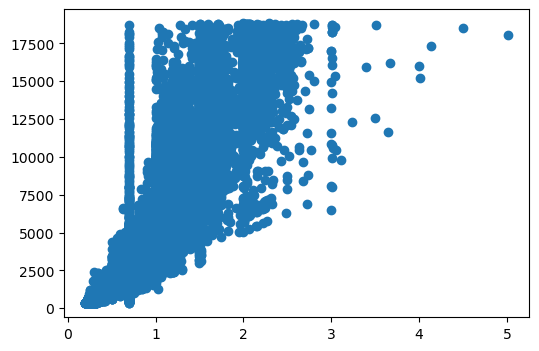

In [47]:
plt.figure(figsize=(6,4))

plt.scatter(df['carat'], df['price']);

In [48]:
np.corrcoef(df['carat'], df['price'])[0][1]

0.9164989435440217

### Cut (огранка алмаза)

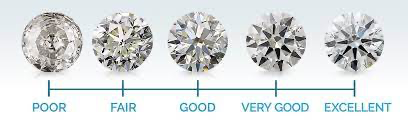

In [51]:
df['cut'].value_counts(normalize=True).sort('proportion', descending=True)

cut,proportion
str,f64
"""Ideal""",0.398941
"""Premium""",0.255088
"""Very Good""",0.224013
"""Good""",0.090772
"""Fair""",0.0297
"""Goood""",0.001487


In [52]:
df = df.with_columns(
    pl.col('cut').replace('Goood', 'Good')
)

Посмотрим как влияет огранка алмаза на его стоимость

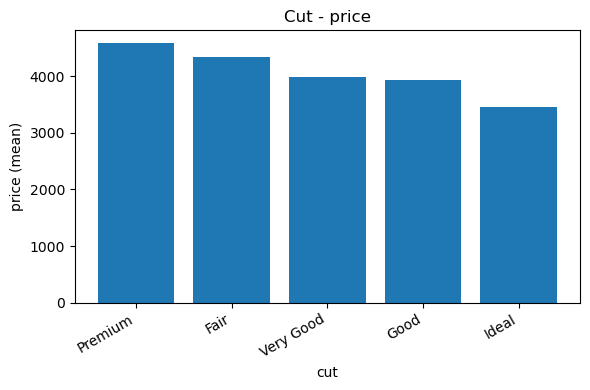

In [54]:
agg = (
    df.group_by("cut")
      .agg(pl.col("price").mean().alias("price_mean"))
      .sort("price_mean", descending=True)
)

cuts = agg["cut"].to_list()
means = agg["price_mean"].to_list()

plt.figure(figsize=(6,4))
plt.bar(cuts, means)
plt.title("Cut - price")
plt.xlabel("cut")
plt.ylabel("price (mean)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [56]:
# ваш код здесь

print(round(df.filter(pl.col('cut') == 'Fair')['carat'].max(), 2))

5.01


Посчитаем среднюю стоимость алмазов в каждой категории

In [58]:
df.group_by('cut').agg(pl.col('price').mean())

cut,price
str,f64
"""Fair""",4347.735294
"""Very Good""",3982.162781
"""Ideal""",3462.59385
"""Premium""",4581.864918
"""Good""",3926.266317


Посчитаем несколько характеристик в зависимости от огранки

In [60]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
])

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Very Good""",3982.162781,2649.0,0.804177
"""Fair""",4347.735294,3282.0,1.040094
"""Premium""",4581.864918,3175.0,0.889616
"""Good""",3926.266317,3029.5,0.845796
"""Ideal""",3462.59385,1813.0,0.703331


In [61]:
df.group_by('cut').agg([
    pl.col('price').mean().alias('PriceMean'),
    pl.col('price').median().alias('PriceMedian'),
    pl.col('carat').mean().alias('CaratMean')
]).sort('PriceMean', descending=True)

cut,PriceMean,PriceMedian,CaratMean
str,f64,f64,f64
"""Premium""",4581.864918,3175.0,0.889616
"""Fair""",4347.735294,3282.0,1.040094
"""Very Good""",3982.162781,2649.0,0.804177
"""Good""",3926.266317,3029.5,0.845796
"""Ideal""",3462.59385,1813.0,0.703331


## Table and Depth

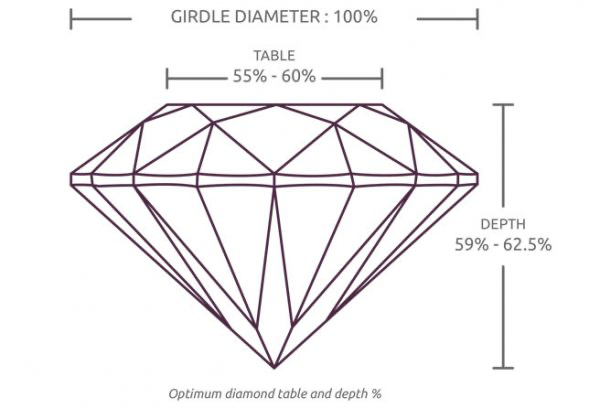

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [65]:
df.filter((pl.col('table') >= 55) & (pl.col('table') <= 60)).height / df.height

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [67]:
# ваш код здесь

round(df.filter(
    (pl.col('table') >= 55) & (pl.col('table') <= 60) &
    (pl.col('depth') >= 59) & (pl.col('depth') <= 62.5)
).height / df.height, 2)

0.62

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [69]:
# ваш код здесь

price_median_all = df['price'].median()
price_median_optimal_table_depth = df.filter(
    (pl.col('table') >= 55) & (pl.col('table') <= 60) &
    (pl.col('depth') >= 59) & (pl.col('depth') <= 62.5)
)['price'].median()

print(f'Медианная стоимость всех алмазов: {price_median_all}')
print(f'Медианная стоимость алмазов с оптимальными table & depth: {price_median_optimal_table_depth}')

if price_median_all < price_median_optimal_table_depth:
    print('Медианная стоимость всех алмазов МЕНЬШЕ медианной стоимости алмазов с оптимальными table & depth')
else:
    print('Медианная стоимость всех алмазов БОЛЬШЕ медианной стоимости алмазов с оптимальными table & depth')

Медианная стоимость всех алмазов: 2401.0
Медианная стоимость алмазов с оптимальными table & depth: 2215.0
Медианная стоимость всех алмазов БОЛЬШЕ медианной стоимости алмазов с оптимальными table & depth


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [71]:
np.corrcoef(df['table'], df['price'])[0][1]

0.12662153885758196

In [72]:
np.corrcoef(df['depth'], df['price'])[0][1]

-0.01083161422683723

Параметр `table` влияет на `price` намного больше, чем параметр `depth`

## Clarity - прозрачность алмаза

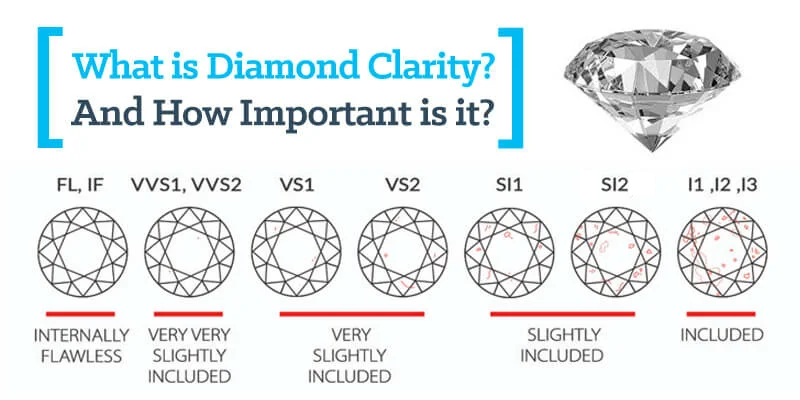

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [77]:
# ваш код здесь

df['clarity'].unique()

clarity
str
"""IF"""
"""VS2"""
"""I1"""
"""VS1"""
"""SI2"""
"""VVS1"""
"""VVS2"""
"""SI1"""


### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [79]:
# ваш код здесь

df.filter(
    pl.col('clarity').is_in(['VVS1', 'VVS2'])
).height

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

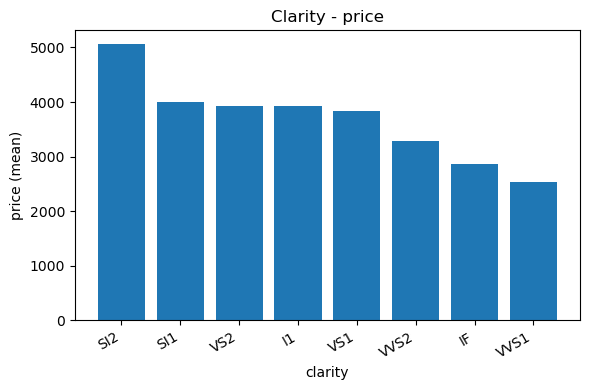

Самые дорогие алмазы в данных — категории clarity: SI2


In [81]:
# ваш код здесь

agg = (
    df.group_by("clarity")
      .agg(pl.col("price").mean().alias("price_mean"))
      .sort("price_mean", descending=True)
)

clarities = agg["clarity"].to_list()
means = agg["price_mean"].to_list()

plt.figure(figsize=(6,4))
plt.bar(clarities, means)
plt.title("Clarity - price")
plt.xlabel("clarity")
plt.ylabel("price (mean)")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

# какая категория дороже остальных
top_clarity = agg[0, "clarity"]
print("Самые дорогие алмазы в данных — категории clarity:", top_clarity)


### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [83]:
# ваш код здесь


res = (
    df.group_by(["cut", "clarity"])
      .agg(
          pl.col("price").mean().alias("price_mean"),
          pl.col("price").median().alias("price_median"),
      )
      .sort("price_mean", descending=True)
)

print(res)  

top_cut, top_clarity = res.select(["cut", "clarity"]).row(0)
print(f"Максимальная средняя стоимость у пары: ({top_cut},{top_clarity})")

shape: (40, 4)
┌───────────┬─────────┬─────────────┬──────────────┐
│ cut       ┆ clarity ┆ price_mean  ┆ price_median │
│ ---       ┆ ---     ┆ ---         ┆ ---          │
│ str       ┆ str     ┆ f64         ┆ f64          │
╞═══════════╪═════════╪═════════════╪══════════════╡
│ Premium   ┆ SI2     ┆ 5556.262491 ┆ 4292.5       │
│ Fair      ┆ SI2     ┆ 5145.740175 ┆ 3681.0       │
│ Very Good ┆ SI2     ┆ 4988.709447 ┆ 4042.0       │
│ Ideal     ┆ SI2     ┆ 4761.711917 ┆ 4068.0       │
│ Good      ┆ SI2     ┆ 4544.119816 ┆ 3763.0       │
│ …         ┆ …       ┆ …           ┆ …            │
│ Ideal     ┆ VVS1    ┆ 2474.09024  ┆ 1114.0       │
│ Very Good ┆ VVS1    ┆ 2451.883249 ┆ 941.0        │
│ Ideal     ┆ IF      ┆ 2279.618257 ┆ 1020.0       │
│ Good      ┆ VVS1    ┆ 2272.391534 ┆ 977.0        │
│ Fair      ┆ IF      ┆ 1912.333333 ┆ 1849.0       │
└───────────┴─────────┴─────────────┴──────────────┘
Максимальная средняя стоимость у пары: (Premium,SI2)


## Pandas profiling

In [85]:
 !pip install ydata_profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [86]:
from ydata_profiling import ProfileReport
import pandas as pd

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 297.54it/s]
C:\Users\tchag\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\tchag\anaconda3\Lib\site-packages\ydata_profiling\model\missing.py:132: UserWarning: There was an attempt to generate the Heatmap missing values diagrams, but this failed.
        To hide this warning, disable the calculation
        (using `df.profile_report(missing_diagrams={"Heatmap": False}`)
        If this is problematic for your use case, please report this as an issue:
        https://github.com/ydataai/ydata-profiling/issues
        (include the error message: 'could not convert string to float: '--'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

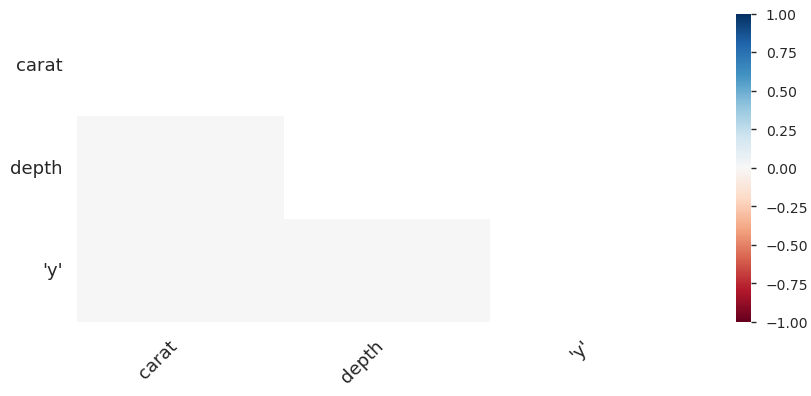

In [87]:
!pip -q install -U ydata-profiling ipywidgets jupyterlab_widgets

from ydata_profiling import ProfileReport
import pandas as pd
from IPython.display import IFrame

df_copy = pd.read_csv(DIAMONDS_DATASET)

report = ProfileReport(df_copy, title="Pandas Profiling Report")
report.to_file("profiling_report.html")

IFrame("profiling_report.html", width="100%", height=800)

In [88]:
#profile_report

In [89]:
#profile_report.to_file('Diamonds_report.html')

# Домашнее задание

## 1) x, y, z

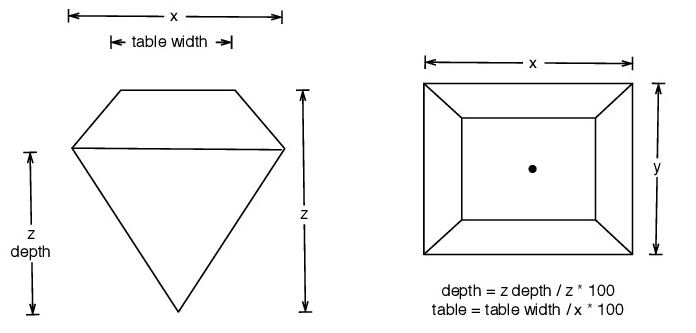

In [93]:
df.columns

['carat',
 'cut',
 'color',
 'clarity',
 'depth',
 'table',
 'price',
 "'x'",
 "'y'",
 "'z'"]

Переименуем колонки

In [95]:
df = df.rename({"'x'": 'x', "'y'": 'y', "'z'": 'z'})
df.columns

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [97]:
# ваш код здесь
x_median = df['x'].median()
y_median = df['y'].median()
z_median = df['z'].median()

medians = {'x': x_median, 'y': y_median, 'z': z_median}
max_col = max(medians, key=medians.get)

print(f'Столбец {max_col} имеет максимальное медианное значение {medians[max_col]}')

Столбец y имеет максимальное медианное значение 5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [99]:
df.filter(pl.col('x') > 0)['x'].min(), df.filter(pl.col('y') > 0)['y'].min(), df.filter(pl.col('z') > 0)['z'].min()

(3.73, 3.68, 1.07)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [102]:
# ваш код здесь
df_bad_x_y_z = df.filter(
    (pl.col('x') == 0) | (pl.col('y') == 0) | (pl.col('z') == 0)
)
print(f'Всего строк: {df_bad_x_y_z.height}')
df_bad_x_y_z.select(['x', 'y', 'z'])

Всего строк: 19


x,y,z
f64,f64,f64
8.52,8.42,0.0
6.5,6.47,0.0
8.42,8.37,0.0
0.0,0.0,0.0
0.0,0.0,0.0
…,…,…
0.0,6.62,0.0
6.5,6.47,0.0
8.49,8.45,0.0


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [104]:
# ваш код здесь
df = df.filter(
    (pl.col('x') > 0) & (pl.col('y') > 0) & (pl.col('z') > 0)
)
df.height

53786

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [106]:
x_corr_val = df.select(pl.corr('x', 'price')).item()
y_corr_val = df.select(pl.corr('y', 'price')).item()
z_corr_val = df.select(pl.corr('z', 'price')).item()

print(f'Корреляция между x и price: {x_corr_val}')
print(f'Корреляция между y и price: {y_corr_val}')
print(f'Корреляция между z и price: {z_corr_val}')

correlations = {'x': x_corr_val, 'y': y_corr_val, 'z': z_corr_val}
print(f'Больше всего с ценой алмаза коррелирует столбец {max(correlations, key=lambda k: correlations[k])}')

Корреляция между x и price: 0.8871831258995103
Корреляция между y и price: 0.8676646720310973
Корреляция между z и price: 0.8680889917330578
Больше всего с ценой алмаза коррелирует столбец x


### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

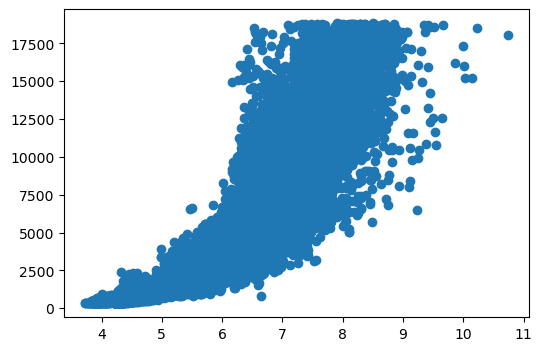

In [108]:
# ваш код здесь

plt.figure(figsize=(6,4))

plt.scatter(df['x'], df['price']);

Эта зависимость больше всего напоминает `полиномиальную`

### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [111]:
# ваш код здесь
x_mean = df['x'].mean()
y_mean = df['y'].mean()

int(df.filter(
    (pl.col('x') > x_mean) & (pl.col('y') > y_mean)
).height / df.height * 100)

47

### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [113]:
# ваш код здесь

z_median = df['z'].median()

result = df.filter(
    (pl.col('carat') >= 1) & (pl.col('z') < z_median)
).height / df.height

print(round(result, 4))

0.0001


## 2) Color

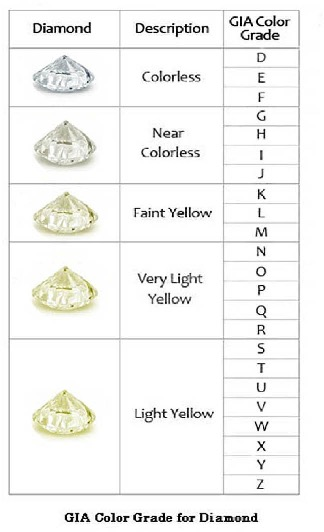

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [117]:
# ваш код здесь

print(sorted(df['color'].unique()))

['D', 'E', 'F', 'G', 'H', 'I', 'J']


Алмазы в данных относятся к первым двум категориям: Colorless и Near Colorless

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

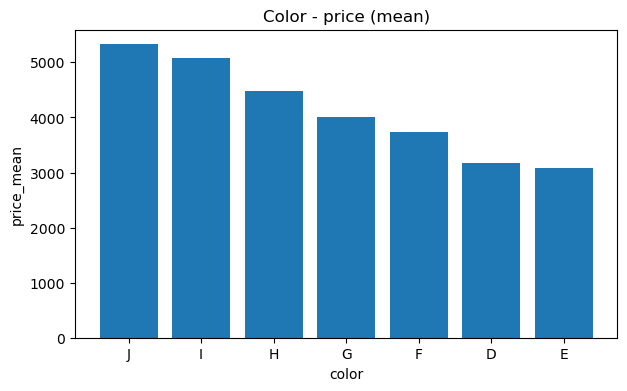

Самые дорогие алмазы в данных — цвета J


In [123]:
# ваш код здесь

agg = (
    df.group_by("color")
      .agg(pl.col("price").mean().alias("price_mean"))
      .sort("price_mean", descending=True)
)

# график
plt.figure(figsize=(7,4))
plt.bar(agg["color"].to_list(), agg["price_mean"].to_list())
plt.title("Color - price (mean)")
plt.xlabel("color")
plt.ylabel("price_mean")
plt.show()

# самый дорогой цвет
top_color = agg[0, "color"]
print("Самые дорогие алмазы в данных — цвета", top_color)

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [127]:
# ваш код здесь

grp = (
    df.group_by("color")
      .agg(
          pl.col("carat").median().alias("CaratMedian"),
          pl.col("price").median().alias("PriceMedian"),
      )
      .sort("PriceMedian", descending=True)
)

print(grp)

# проверка: CaratMedian не возрастает при убывании PriceMedian
carats = grp["CaratMedian"].to_list()
is_non_increasing = all(carats[i] >= carats[i+1] for i in range(len(carats)-1))
print("CaratMedian не возрастает:", is_non_increasing)

shape: (7, 3)
┌───────┬─────────────┬─────────────┐
│ color ┆ CaratMedian ┆ PriceMedian │
│ ---   ┆ ---         ┆ ---         │
│ str   ┆ f64         ┆ f64         │
╞═══════╪═════════════╪═════════════╡
│ J     ┆ 1.11        ┆ 4234.5      │
│ I     ┆ 1.0         ┆ 3721.5      │
│ H     ┆ 0.9         ┆ 3449.5      │
│ F     ┆ 0.7         ┆ 2345.0      │
│ G     ┆ 0.7         ┆ 2242.0      │
│ D     ┆ 0.54        ┆ 1842.0      │
│ E     ┆ 0.54        ┆ 1741.0      │
└───────┴─────────────┴─────────────┘
CaratMedian не возрастает: True


Утверждение про CaratMedian `верное`.

### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [129]:
# ваш код здесь

result = df.group_by(['cut', 'color', 'clarity']).agg(
    pl.col('price').mean()
).sort(by='price', descending=True).row(0)[:3]
print(f"({result[0]},{result[1]},{result[2]})".replace(' ', '').replace("'", ''))

(VeryGood,D,IF)
